In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


# **HEART DISEASE EDA**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Understanding the data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


**DATA CLEANING**

In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


# **UNIVARIATE ANALYSIS**

### NUMERICAL COLUMNS

In [10]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [11]:
# Age Column
df['Age'].describe()

,Age
count,918.000000
mean,53.510893
std,9.432617
min,28.000000
25%,47.000000
50%,54.000000
75%,60.000000
max,77.000000


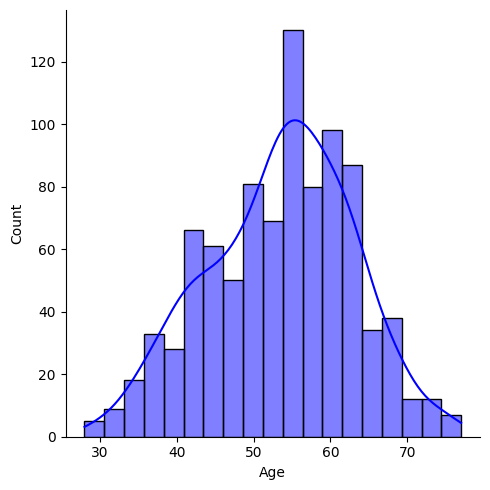

In [73]:
# Distribution of Age
sns.displot(df['Age'],kde=True,color='blue')
plt.savefig('images/age_distribution.png')
plt.show()

The age distribution is not skewed and the majourity of the people are in the age group 50-60

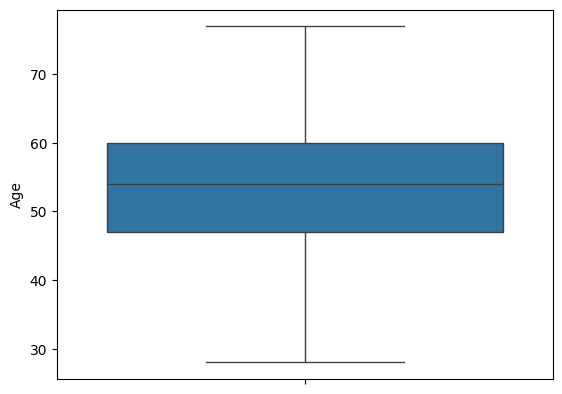

In [72]:
# Age Boxplot
sns.boxplot(df['Age'])
plt.savefig('images/age_boxplot.png')
plt.show()

The age column does not contain any outlier and the median age is around 55

In [14]:
# Cholestrol Column- Summary
df['Cholesterol'].describe()

,Cholesterol
count,918.000000
mean,198.799564
std,109.384145
min,0.000000
25%,173.250000
50%,223.000000
75%,267.000000
max,603.000000


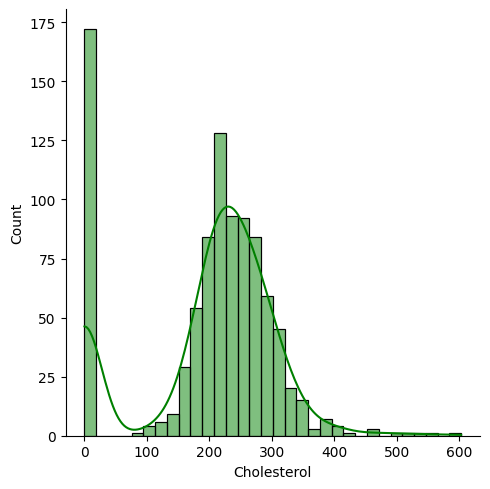

In [74]:
# Distribution of Cholestrol Variable
sns.displot(df['Cholesterol'],kde=True,color='green')
plt.savefig('images/Cholesterol_dist')
plt.show()

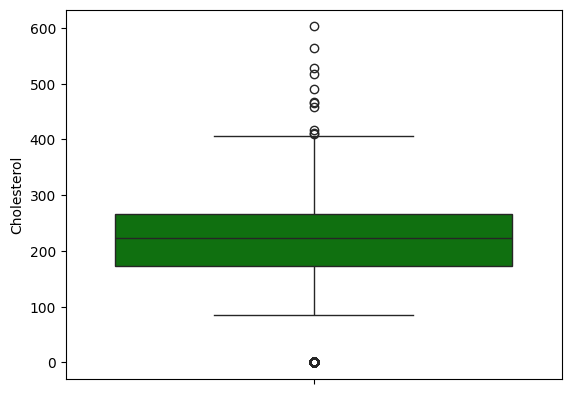

In [75]:
# Cholestrol variable Boxplot
sns.boxplot(df['Cholesterol'],color='green')
plt.savefig('images/Cholesterol_boxplot.png')
plt.show()

The cholestrol column contains large no of outliers which can be infered from the boxplot

In [17]:
## RestingBP
df['RestingBP'].describe()

,RestingBP
count,918.000000
mean,132.396514
std,18.514154
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


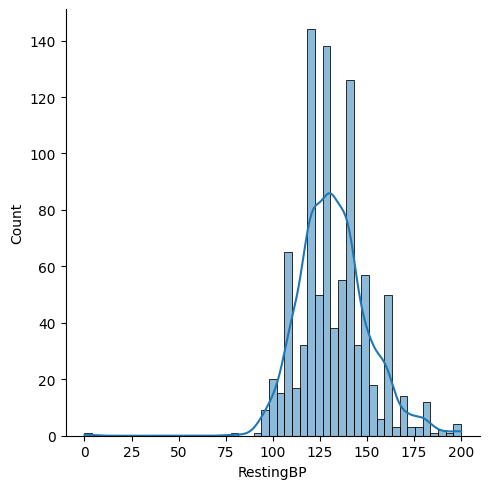

In [18]:
# RestingBP Distribution
sns.displot(df['RestingBP'],kde=True)

<Axes: ylabel='RestingBP'>

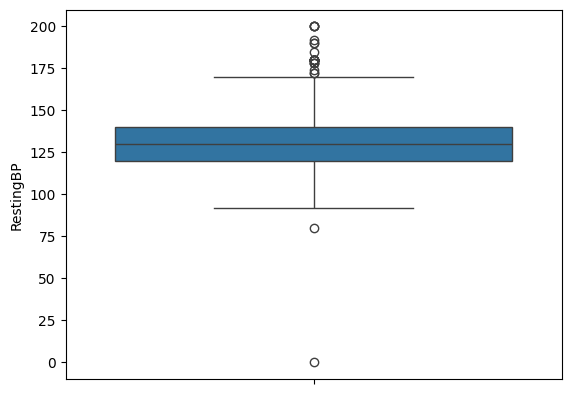

In [19]:
## Box Plot
sns.boxplot(df['RestingBP'])

In [20]:
## MaxHR Variable
df['MaxHR'].describe()

,MaxHR
count,918.000000
mean,136.809368
std,25.460334
min,60.000000
25%,120.000000
50%,138.000000
75%,156.000000
max,202.000000


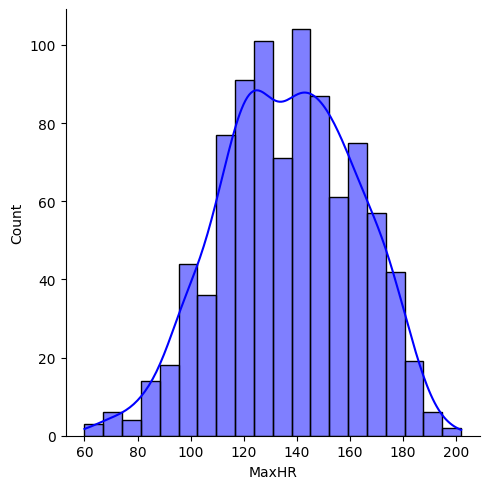

In [21]:
# Distribution of MaxHR
sns.displot(df['MaxHR'],kde=True,color='blue')

<Axes: ylabel='MaxHR'>

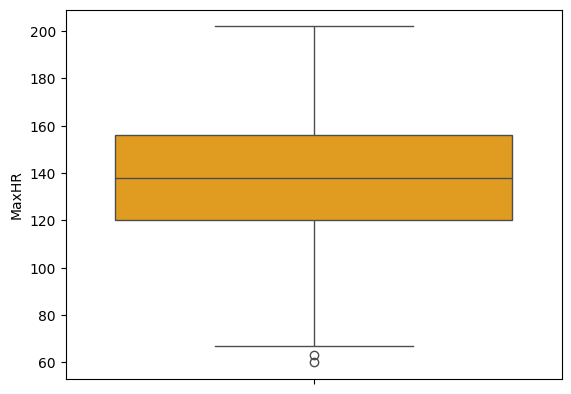

In [22]:
# BOX PLOT
sns.boxplot(df['MaxHR'],color='orange')

## **CATEGORICAL VARIABLES**

In [23]:
df['Sex'].unique()

array(['M', 'F'], dtype=object)

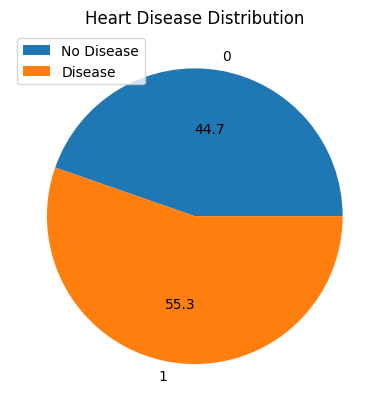

In [71]:
## WHAT PERCENTAGE OF PEOPLE ARE HAVING HEART DISEASES?
df.groupby('HeartDisease').size().plot(kind='pie',autopct='%.1f')
plt.legend(labels=['No Disease','Disease'])
plt.title('Heart Disease Distribution')
plt.savefig('images/heart_disease_distribution.png')
plt.show()

**Out of all the people 55.3% of them are having heart diseases**

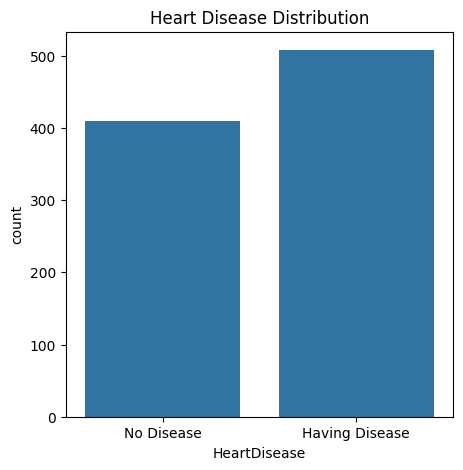

In [25]:
## Count Plot
plt.figure(figsize=(5,5))
sns.countplot(x='HeartDisease',data=df)
plt.title('Heart Disease Distribution')
plt.xticks([0,1],['No Disease','Having Disease'])
plt.show()


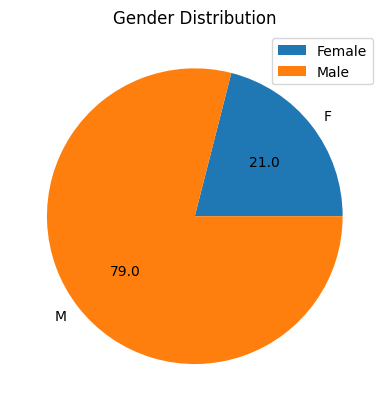

In [78]:
## GENDER DISTRIBUTION
df.groupby('Sex').size().plot(kind='pie',autopct='%.1f') ## PIE CHART VISUALIZATION
plt.title('Gender Distribution')
plt.legend(labels=['Female','Male'])
plt.savefig('images/gender_distribution.png')
plt.show()

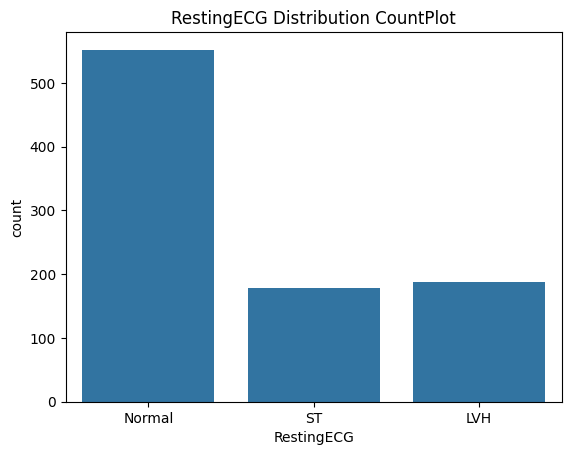

In [27]:
## RESTING ECG DISTRIBUTION
sns.countplot(x='RestingECG',data=df)
plt.title('RestingECG Distribution CountPlot')
plt.show()

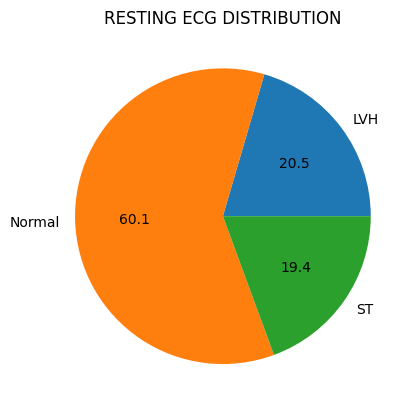

In [28]:
## RESTING ECG DISTRIBUTION
df.groupby('RestingECG').size().plot(kind='pie',autopct='%.1f')
plt.title('RESTING ECG DISTRIBUTION')
plt.show()

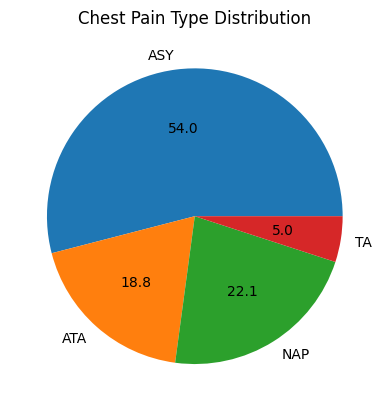

In [89]:
## dISTRIBUTION OF CHEST PAIN TYPES
df.groupby('ChestPainType').size().plot(kind='pie',autopct='%.1f')
plt.title('Chest Pain Type Distribution')
plt.savefig('images/chestpain_distribution.png')
plt.show()

**ASY Chest Pain is the most common.**

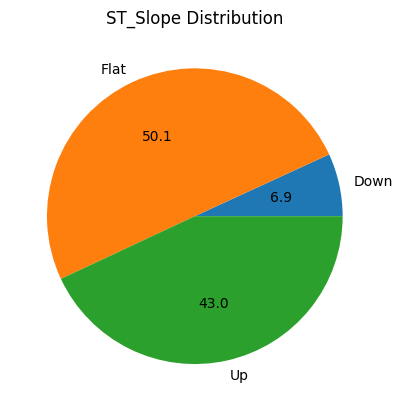

In [30]:
## ST_SLOPE COLUMN ANALYSIS
df.groupby('ST_Slope').size().plot(kind='pie',autopct='%.1f')
plt.title('ST_Slope Distribution')
plt.show()

## **BIVARIATE ANALYSIS**

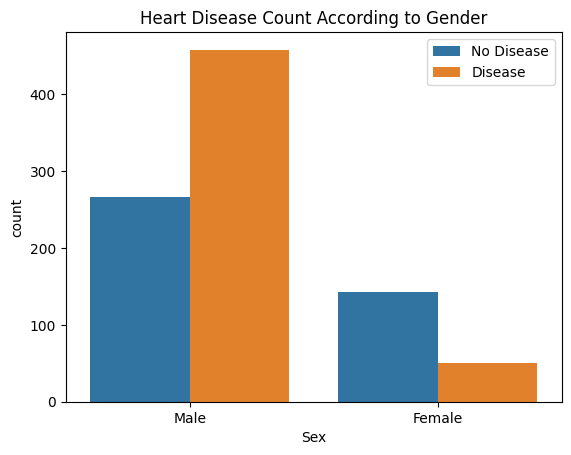

In [79]:
## HEART DISEASE AND GENDER
sns.countplot(x='Sex',hue='HeartDisease',data=df)
plt.xticks([0,1],['Male','Female'])
plt.title('Heart Disease Count According to Gender')
plt.legend(labels=['No Disease', 'Disease'])
plt.savefig('images/Heart_disease_gender.png')
plt.show()


/tmp/ipython-input-32-2500908473.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['HeartDisease']==1]['Age'],hist=False)


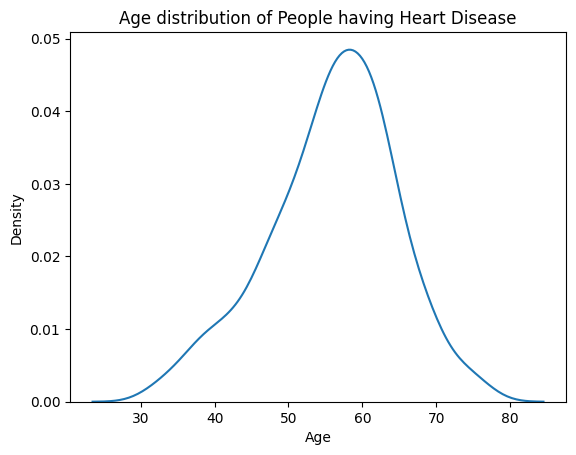

In [32]:
## AGE DISTRIBUTION OF PEOPLE HAVING HEART DISEASE
sns.distplot(df[df['HeartDisease']==1]['Age'],hist=False)
plt.title('Age distribution of People having Heart Disease')
plt.show()

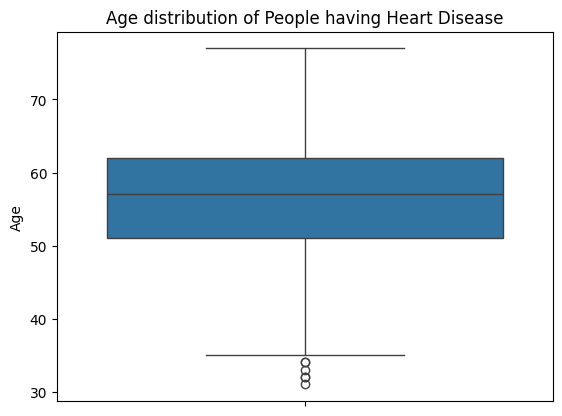

In [33]:
sns.boxplot(df[df['HeartDisease']==1]['Age'])
plt.title('Age distribution of People having Heart Disease')
plt.show()

**The frequency of heart disease is maximum among people of the age  group 55-60 suggesting that older people are at higher risk of having heart disease**

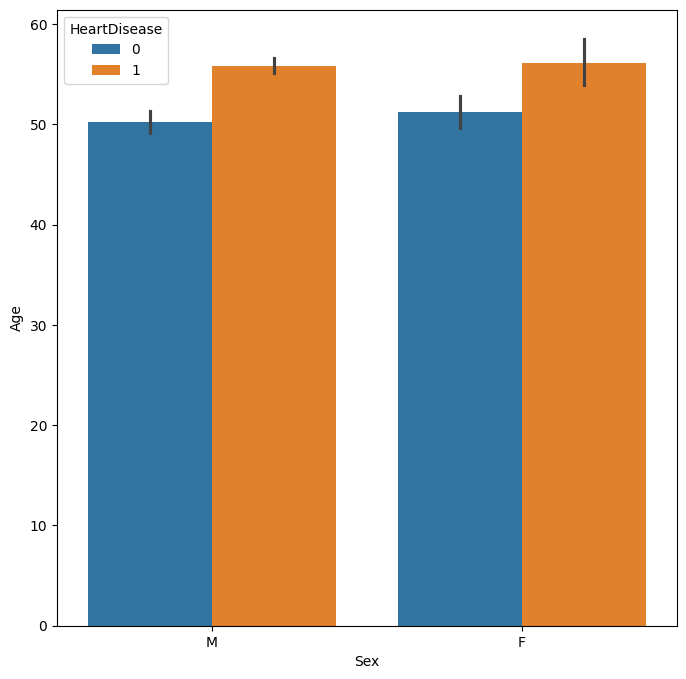

In [34]:
## AGE DISTRIBUTION OF HEART DISEASE AMONG MALES AND FEMALES
plt.figure(figsize=(8,8))
sns.barplot(x='Sex',y='Age',hue='HeartDisease',data=df)
plt.show()

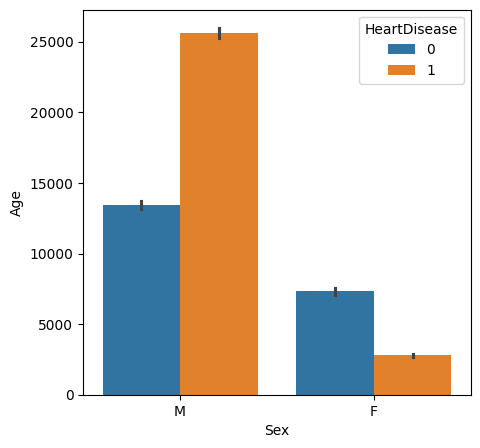

In [35]:
plt.figure(figsize=(5,5))
sns.barplot(x='Sex',y='Age',hue='HeartDisease',estimator=sum,data=df)
plt.show()

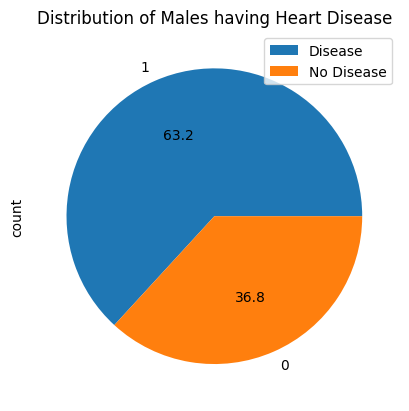

In [83]:
## WHAT PERCENT OF MALES ARE HAVINg HEART DISEASE?
df[df['Sex']=='M']['HeartDisease'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Distribution of Males having Heart Disease')
plt.legend(labels=['Disease','No Disease'])
plt.show()

In [37]:
df[df['Sex']=='M']['HeartDisease'].value_counts()

,count
HeartDisease,
1,458
0,267


**63% out of the total males are having heart disease.**

In [38]:
## WHAT PERCENT OF FEMALES ARE HAVING HEART DISEASES?
total_females=len(df[df['Sex']=='F'])
df_1=df[df['Sex']=='F']
print('The no of females having heart disease is: ',len(df_1[df_1['HeartDisease']==1]))
print('The no of females having heart disease is: ',len(df_1[df_1['HeartDisease']==0]))
print('Percentage of females having heart disease is:',len(df_1[df_1['HeartDisease']==1])/total_females*100,'%')



The no of females having heart disease is:  50
The no of females having heart disease is:  143
Percentage of females having heart disease is: 25.906735751295333 %


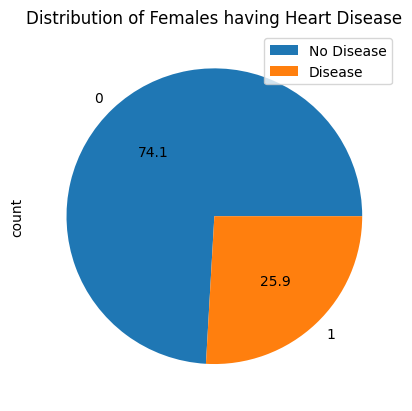

In [85]:
df[df['Sex']=='F']['HeartDisease'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Distribution of Females having Heart Disease')
plt.legend(labels=['No Disease','Disease'])
plt.show()

**Out of all the females only 26% of them are having heart diseases**

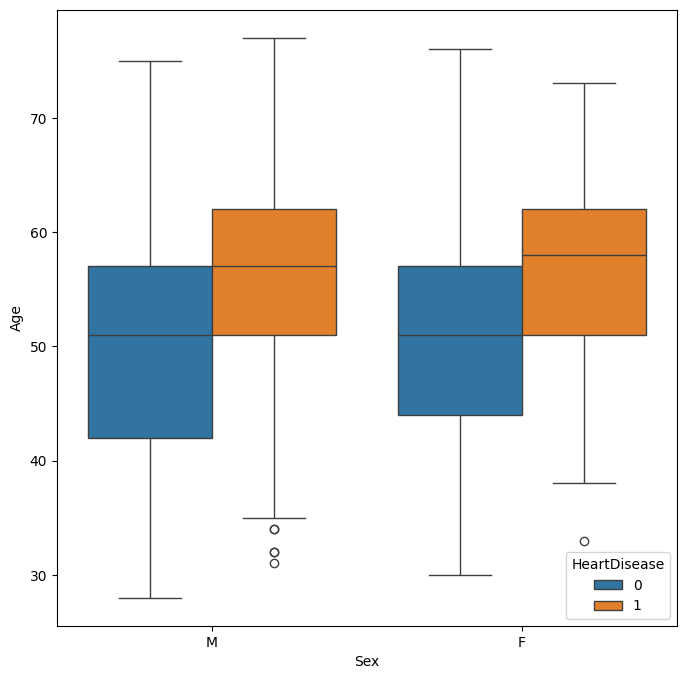

In [86]:
# BOX PLOT
plt.figure(figsize=(8,8))
sns.boxplot(x='Sex',y='Age',hue='HeartDisease',data=df)
plt.savefig('images/age_gender_diseasesplit')
plt.show()

In [41]:
## THE AVERAGE HEALTH METRICS COMPARISON OF PEOPLE WITH AND WITHOUT HEART DISEASES
df_1=df[df['HeartDisease']==1]
df_2=df[df['HeartDisease']==0]

In [42]:
df_1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
11,58,M,ATA,136,164,0,ST,99,Y,2.0,Flat,1
13,49,M,ASY,140,234,0,Normal,140,Y,1.0,Flat,1


In [43]:
## COMPARING CHOLESTEROL LEVELS
print('The average cholesterol levels in heart patients is',df_1['Cholesterol'].mean())
print('The average cholesterol levels in normal patients is',df_2['Cholesterol'].mean())

The average cholesterol levels in heart patients is 175.94094488188978
The average cholesterol levels in normal patients is 227.1219512195122


In [66]:
df.groupby('HeartDisease')[['Age', 'Cholesterol', 'RestingBP', 'MaxHR']].mean()


,Age,Cholesterol,RestingBP,MaxHR
HeartDisease,,,,
0,50.551220,227.121951,130.180488,148.151220
1,55.899606,175.940945,134.185039,127.655512


<Axes: >

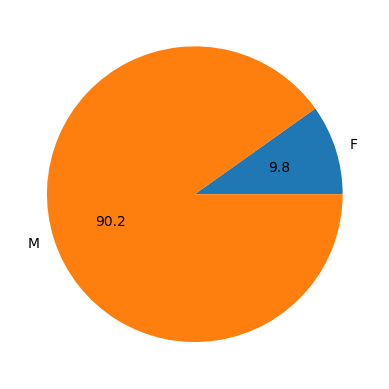

In [44]:
df_1.groupby('Sex').size().plot(kind='pie',autopct='%.1f')

Out of all the people having heart diseases 90.2% are males which can be attributed to higher stress levels in males as compared to females.

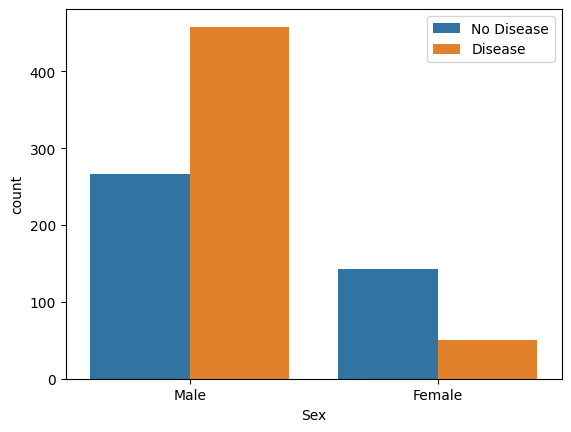

In [45]:
## COUNTPLOT SHOWING NO OF MALES AND FEMALES WITH AND WITHOUT HEART DISEASE
sns.countplot(x='Sex',hue='HeartDisease' ,data=df)
plt.xticks([0,1],['Male','Female'])
plt.legend(labels=['No Disease','Disease'])
plt.show()

<Axes: >

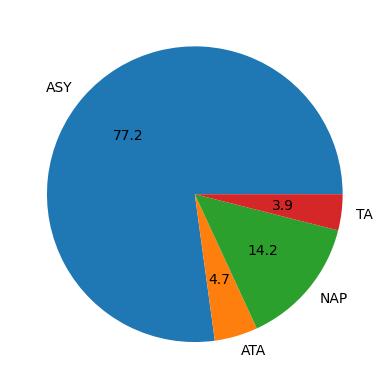

In [46]:
df_1.groupby('ChestPainType').size().plot(kind='pie',autopct='%.1f')

Among the heart patients ASY(Asymptomatic) chest pain is the most commonly reported and most frequently occuring.


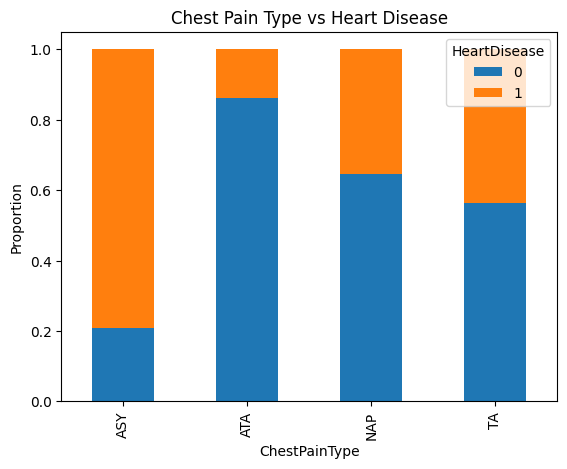

In [88]:
# CHEST PAIN VS HEART DISEASE
pd.crosstab(df['ChestPainType'], df['HeartDisease'], normalize='index').plot(kind='bar', stacked=True)
plt.title("Chest Pain Type vs Heart Disease")
plt.ylabel("Proportion")
plt.savefig('images/chestpain_heartdisease.png')
plt.show()

The above visualization proves that the people with ASY chest pain are more likely to have heart disease.

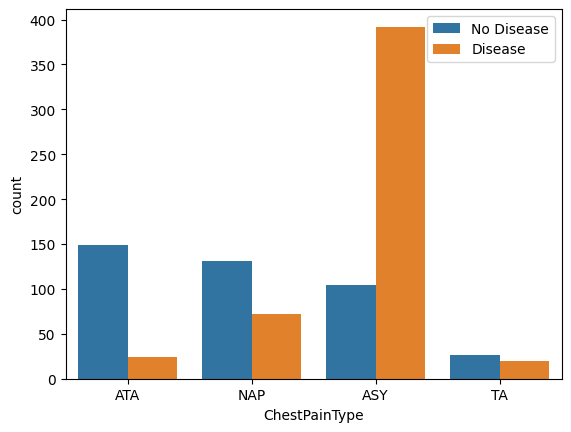

In [48]:
## CHEST PAIN DISTRIBUTION AS PER HEART DISEASE
sns.countplot(x='ChestPainType',hue='HeartDisease',data=df)
plt.legend(labels=['No Disease','Disease'])
plt.show()

In [49]:
print(df_1['RestingBP'].mean())
print(df_2['RestingBP'].mean())

134.18503937007873
130.18048780487806


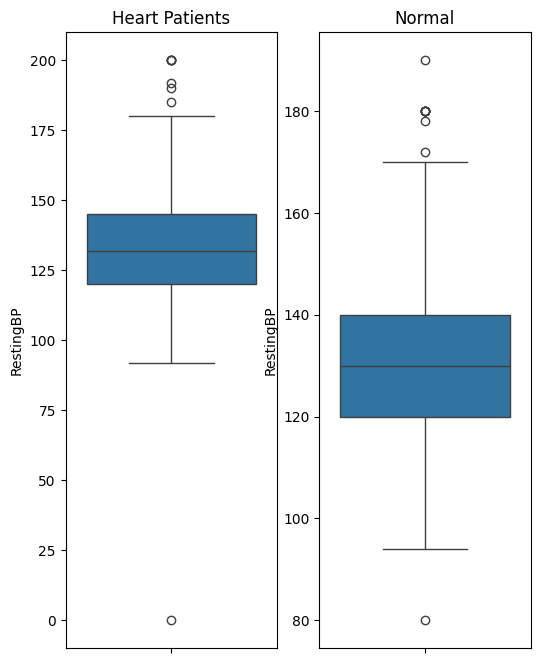

In [50]:
plt.figure(figsize=(6,8))
plt.subplot(1,2,1)
sns.boxplot(df_1['RestingBP'])
plt.title('Heart Patients')
plt.subplot(1,2,2)
sns.boxplot(df_2['RestingBP'])
plt.title('Normal')
plt.show()

In [51]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [52]:
df.dtypes

,0
Age,int64
Sex,object
ChestPainType,object
RestingBP,int64
Cholesterol,int64
FastingBS,int64
RestingECG,object
MaxHR,int64
ExerciseAngina,object
Oldpeak,float64


In [53]:
df_corr=df[['Age','RestingBP','Cholesterol','FastingBS','MaxHR','HeartDisease']]
df_corr.corr()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.400421
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,1.000000


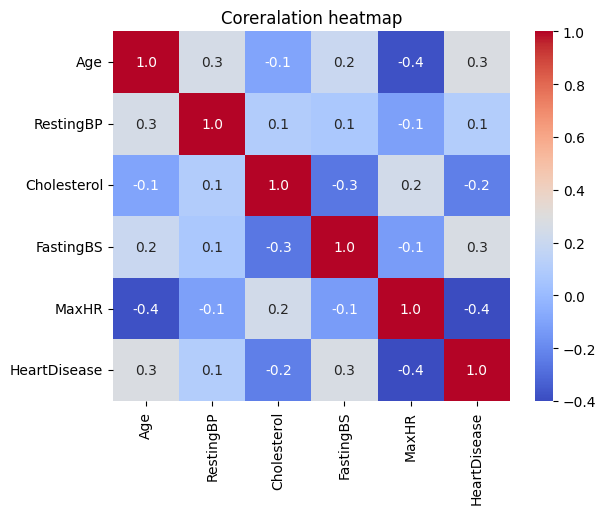

In [90]:
sns.heatmap(df_corr.corr(),annot=True,cmap='coolwarm',fmt='.1f')
plt.title('Coreralation heatmap')
plt.savefig('images/correlation_heatmap.png')
plt.show()

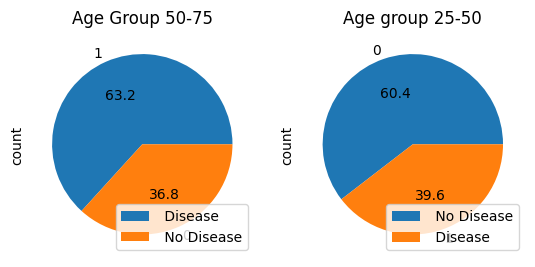

In [65]:
## WHICH AGE GROUP IS AT HIGHER RISK OF GETTING HEART DISEASES?
df_age=df[(df['Age']>=50) & (df['Age']<=75)]
plt.subplot(1,2,1)
df_age['HeartDisease'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Age Group 50-75')
plt.legend(labels=[' Disease',' No Disease'],loc='lower right')
plt.subplot(1,2,2)
df_age=df[(df['Age']>=25) & (df['Age']<=50)]
df_age['HeartDisease'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title('Age group 25-50')
plt.legend(labels=[' No Disease',' Disease'],loc='lower right')
plt.show()



**The above illustration shows that people in the age group 50-75 are at a higher risk of getting heart diseases so they must keep greater care of themselves**

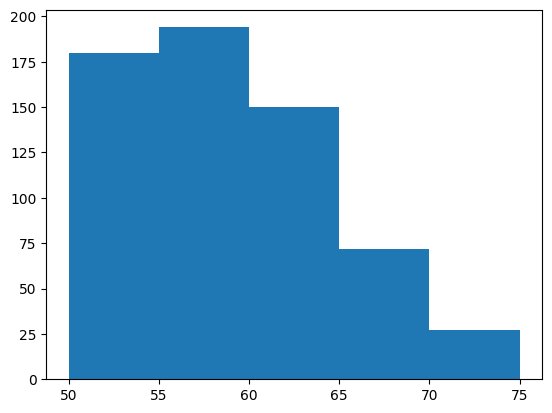

In [56]:
plt.hist(df_age['Age'],bins=5)
plt.show()